## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### The company wants to know:

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands

In [1]:
# Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway #ANOVA
from scipy.stats import ttest_1samp, ttest_ind, norm, t, ttest_ind_from_stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_rel

#non-parametric tests
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import kstest

In [3]:
df = pd.read_csv("yulu.csv")
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## EDA

In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
# Converting the data type of categorical data.
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

In [10]:
# Out of 10886 instances, check if there is any null or missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 723.7+ KB


In [11]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
# Statistical Summary

df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


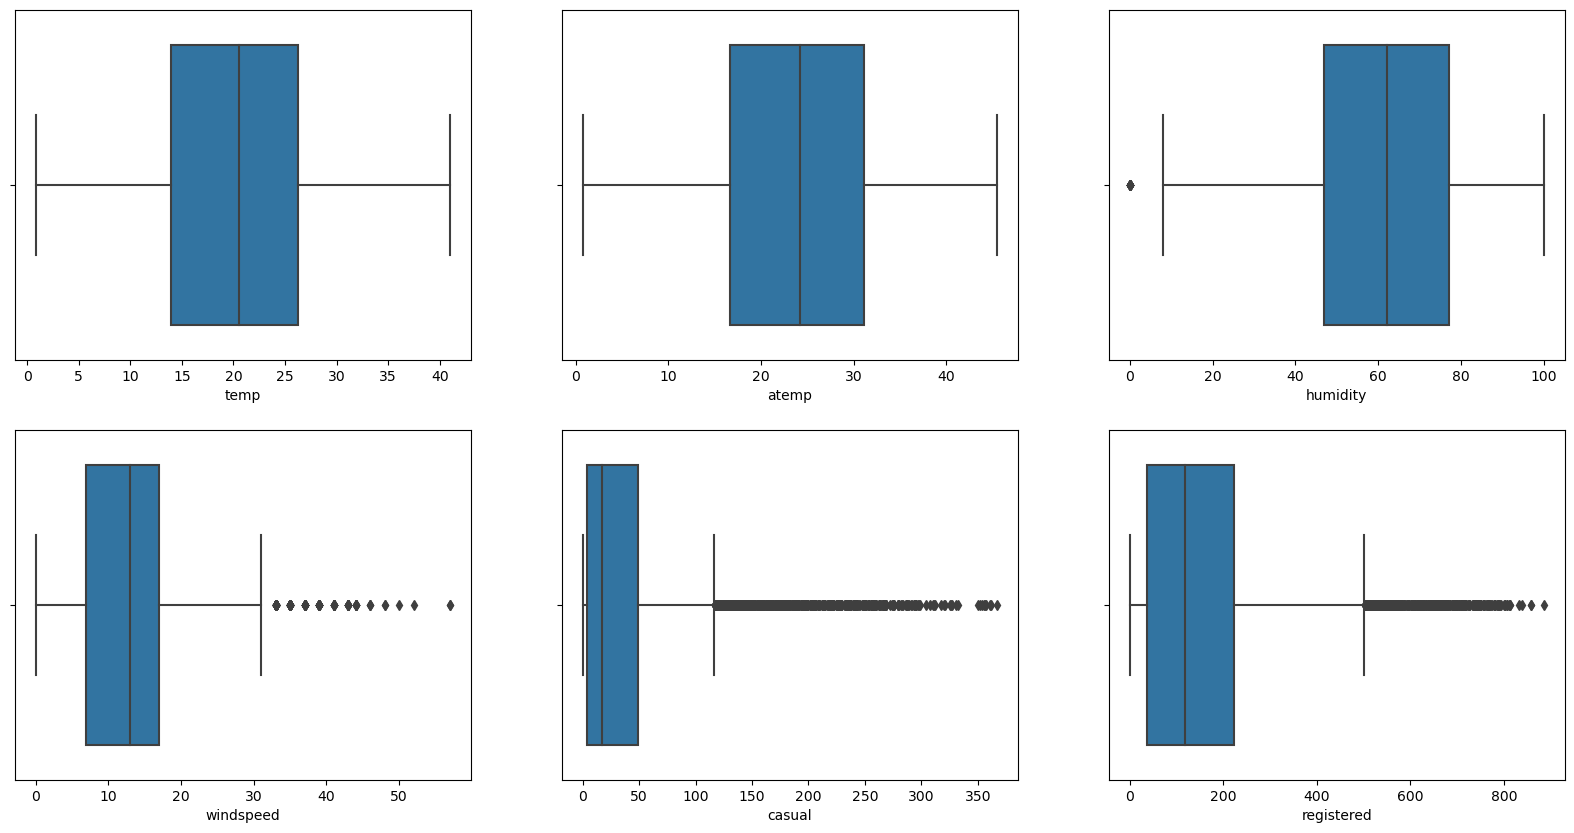

In [13]:
# Outlier Analysis for numerical continous data 

numerical = ['temp','atemp','humidity','windspeed','casual','registered']
plt.figure(figsize=(20,10))
for i in range(len(numerical)):
 plt.subplot(2,3,i+1)
 sns.boxplot(data = df, x = numerical[i])

## Insights - 
1. The mean and median values for temperature, apparent temperature, and humidity are similar, and there are no noticeable outliers for these variables based on the boxplots. 

2. Although there are some outliers with high wind speed, the mean and median wind speeds are still relatively close. 

3. On the other hand, both casual and registered user data have a considerable number of outliers with high mean and low median values, indicating that there are typically fewer users during a particular hour, with some exceptions.

In [16]:
df['season'].value_counts().head(4)

# Highest sales in summer and least sales in spring.

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [18]:
df['holiday'].value_counts()

# More sales on non-holiday days.

0    10575
1      311
Name: holiday, dtype: int64

In [21]:
df['workingday'].value_counts()

# 7:3 ratio for weekday:weekend

1    7412
0    3474
Name: workingday, dtype: int64

In [23]:
df['weather'].value_counts()

# As expected clear weather means more sale and rainy weather means least sales.

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [26]:
df['temp'].value_counts().head(5)

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

In [27]:
df['atemp'].value_counts().head(5)

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

In [28]:
df['humidity'].value_counts().head(5)

88    368
94    324
83    316
87    289
70    259
Name: humidity, dtype: int64

In [29]:
df['windspeed'].value_counts().head(5)

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
Name: windspeed, dtype: int64

In [31]:
df['casual'].value_counts().head(5)

0    986
1    667
2    487
3    438
4    354
Name: casual, dtype: int64

### Lets make distribution graph for each of the numeric continous variable

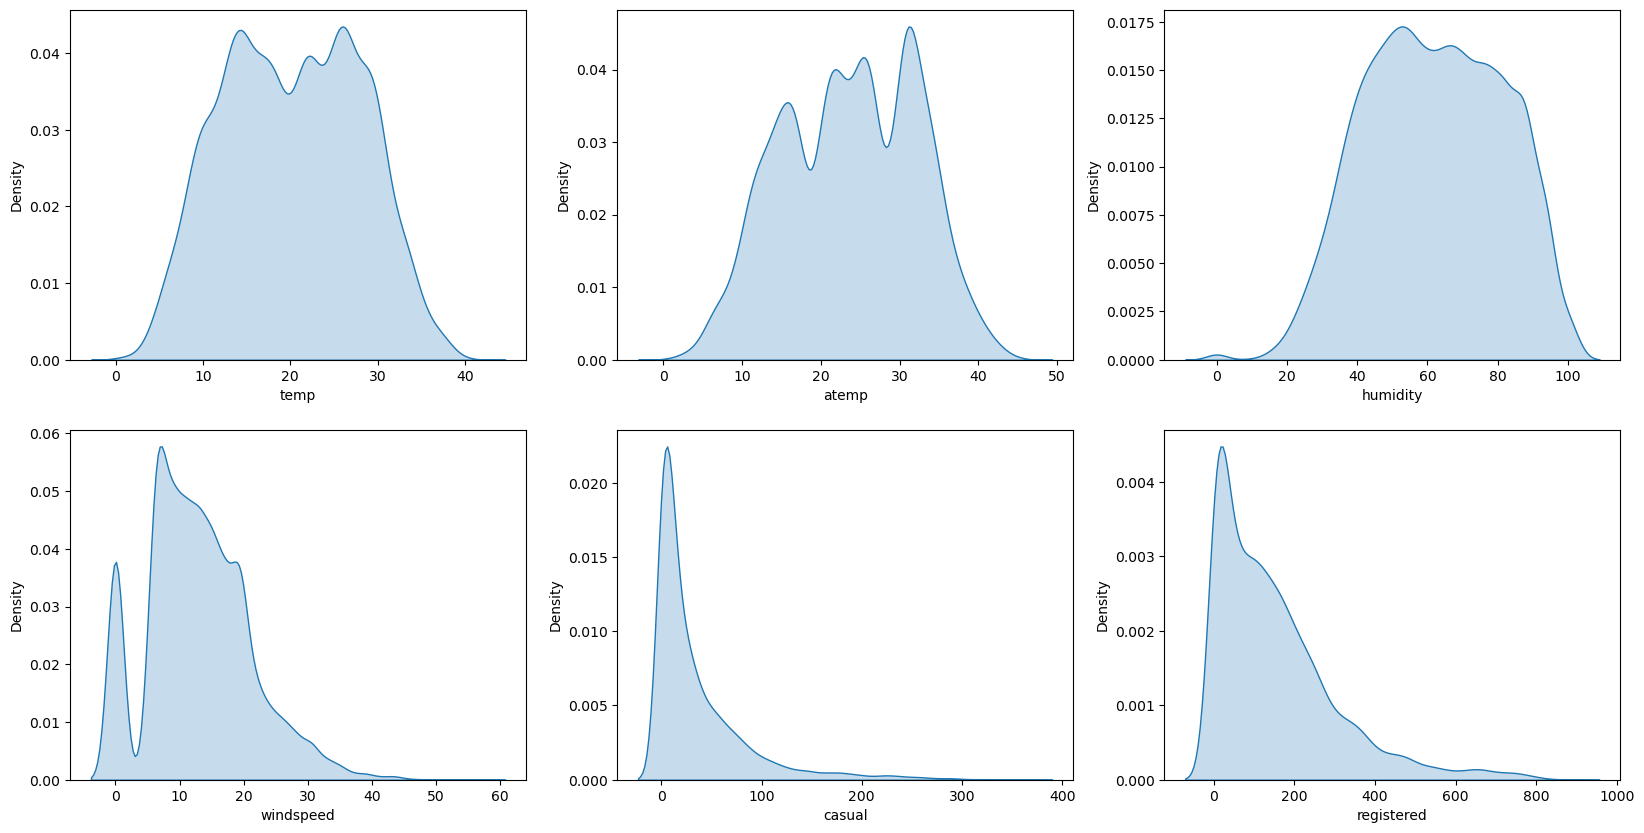

In [32]:
numeric = ['temp','atemp','humidity','windspeed','casual','registered']
plt.figure(figsize=(20,10))
for i in range(len(numeric)):
 plt.subplot(2,3,i+1)
 sns.kdeplot(df[numeric[i]], fill=True)

# Insights -
1. The variables temperature, apparent temperature, and humidity follow a normal distribution, and their mean and median values are in close proximity to each other. 
2. In contrast, windspeed is skewed to the right, indicating high wind speeds on certain days. 
3. Both casual and registered user data also exhibit a right-skewed distribution.

<AxesSubplot:xlabel='count', ylabel='Density'>

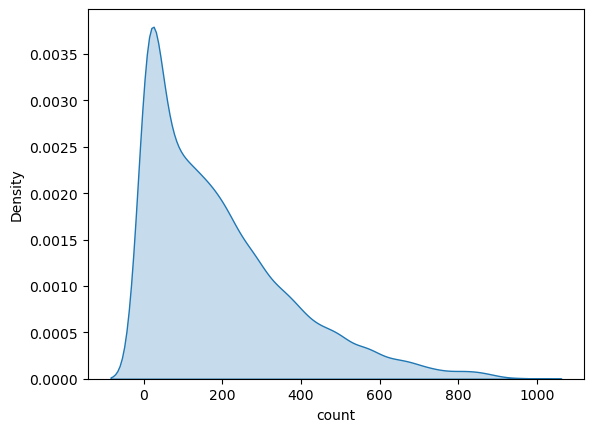

In [35]:
sns.kdeplot(df['count'], fill=True)

# Distribution of count is very similar to "registered" column of the data.

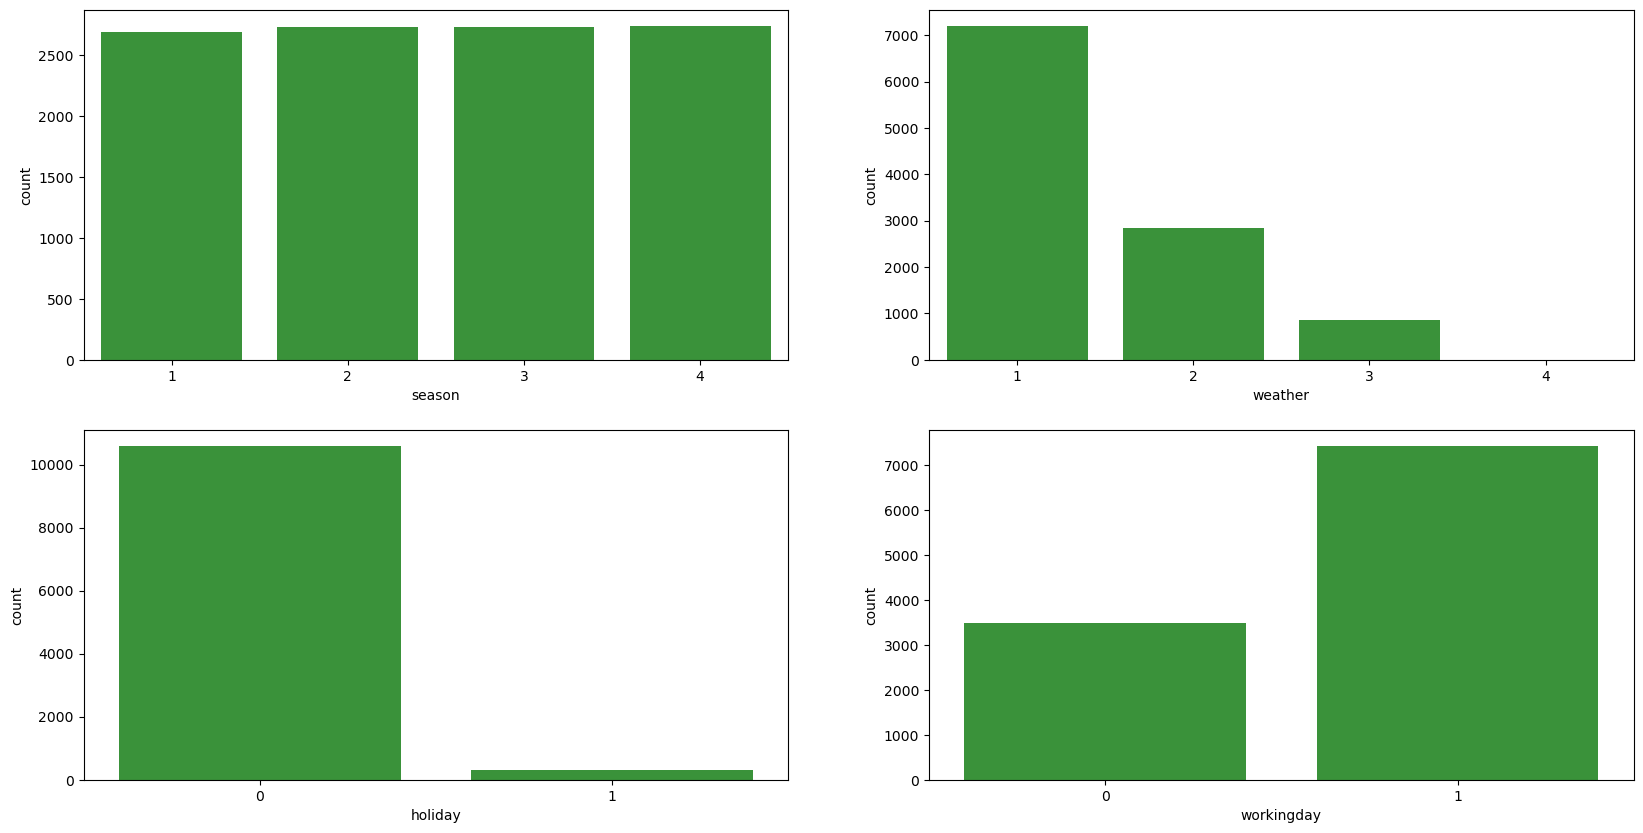

In [37]:
# Lets plot the categorical attributes along with their frequency count.

categorical = ['season', 'weather', 'holiday', 'workingday']
plt.figure(figsize=(20,10))
for i in range(len(categorical)):
    plt.subplot(2,2,i+1)
    sns.countplot(data = df, x =categorical[i], color = 'tab:green')

1. Season - Highest sales in summer and least sales in spring.
2. Weather - As expected clear weather means more sale and rainy weather means least sales.
3. Holiday - More sales on non-holiday days.
4. Working day - 7:3 ratio for weekday:weekend.


### Bivariate Analysis

<AxesSubplot:xlabel='workingday', ylabel='count'>

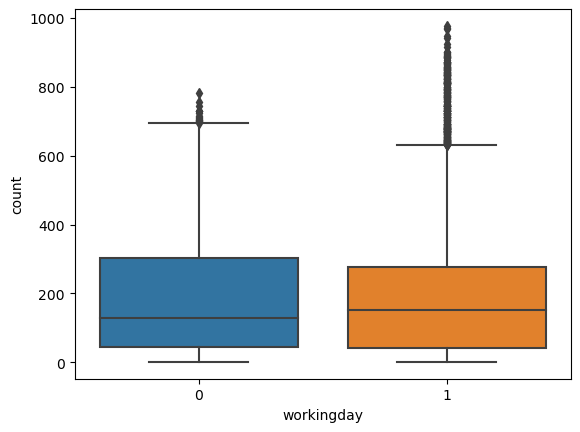

In [38]:
sns.boxplot(data = df, y = 'count', x='workingday')

####  The boxplot depicted above affirms that the number of riders on workdays is greater than on non-working days. Despite this, the median number of riders for both types of days is relatively similar.

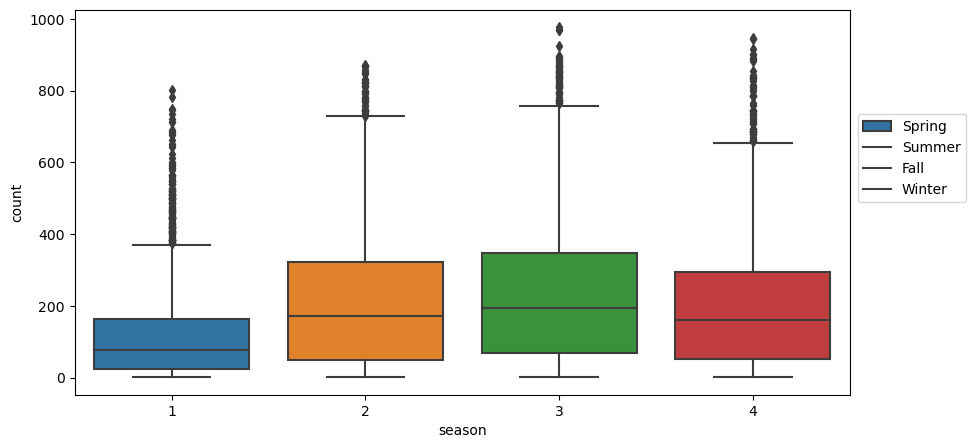

In [47]:
# season vs count

plt.figure(figsize=(10,5))
#sns.boxplot(data = df, y = 'count', x='season',hue='weather')
sns.boxplot(data = df, y = 'count', x='season')
plt.legend(labels=['Spring','Summer','Fall','Winter'],loc=(1.01,0.5))

#### The distribution of riders is comparable across all seasons, except for spring, which has fewer riders compared to the other seasons.

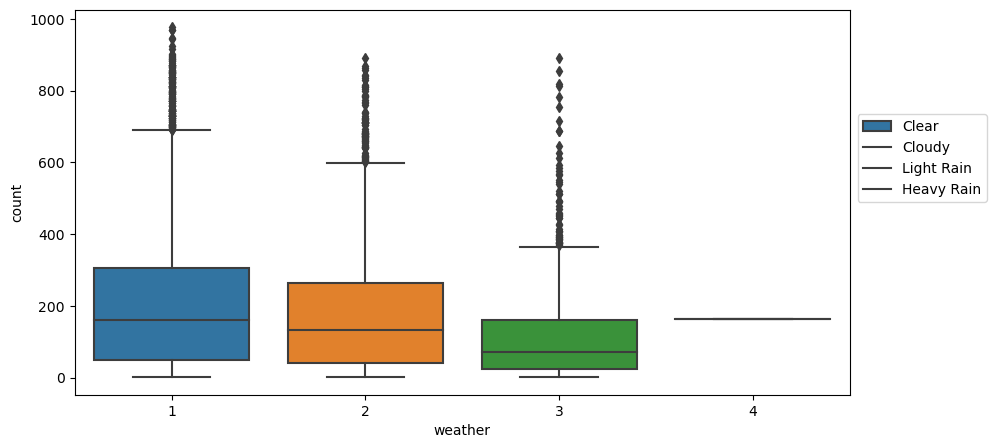

In [48]:
# weather vs count 

plt.figure(figsize=(10,5))
sns.boxplot(data = df, y = 'count', x='weather')
plt.legend(labels=['Clear','Cloudy','Light Rain','Heavy Rain'],loc=(1.01,0.5))

#### It is reasonable to expect that clear weather would attract more riders than cloudy and rainy weather. In fact, weather with heavy rains has almost no users.

<AxesSubplot:xlabel='season', ylabel='count'>

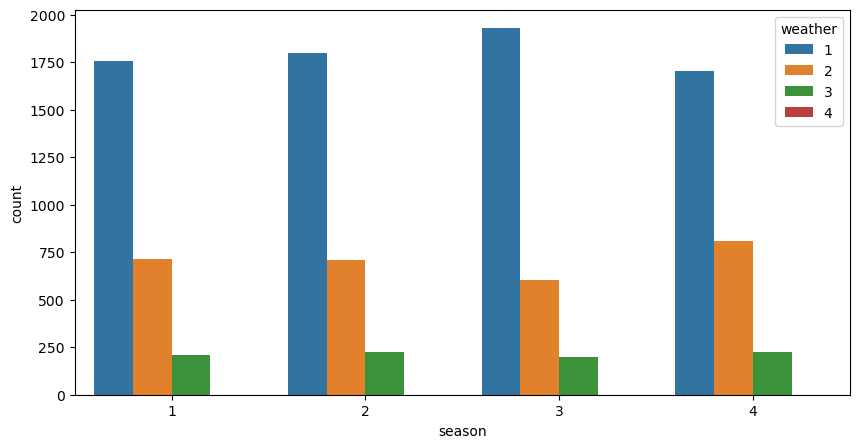

In [49]:
# weather vs season

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='season', hue='weather')

#### The chart above illustrates the correlation between season and weather, and it appears that the distribution of weather is comparable across all seasons. Additionally, all seasons experience the most number of clear sky days.